# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings         #For Ignoring the Warnings
warnings.filterwarnings("ignore")

In [2]:
#Used for Sentiment Analysis
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np
import re
import nltk
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from spellchecker import SpellChecker
from sklearn.preprocessing import normalize


In [3]:
#Used for Model Building
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# **Importing the Dataset**

In [4]:
df = pd.read_csv("McDonald_s_Reviews.csv", encoding="latin-1")

**Exploring the Dataset**

In [5]:
df.head(5)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [6]:
df.columns

Index(['reviewer_id', 'store_name', 'category', 'store_address', 'latitude ',
       'longitude', 'rating_count', 'review_time', 'review', 'rating'],
      dtype='object')

In [7]:
df.sample(5)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
10796,10797,McDonald's,Fast food restaurant,"1650 Washington Ave, Miami Beach, FL 33139, Un...",25.790295,-80.132077,"4,922",3 years ago,The service was good but there was this 1 weir...,4 stars
12407,12408,McDonald's,Fast food restaurant,"1044 US-11, Champlain, NY 12919, United States",44.981410,-73.459820,"1,306",5 years ago,Nice restaurant,4 stars
29831,29832,McDonald's,Fast food restaurant,"9814 International Dr, Orlando, FL 32819, Unit...",28.423814,-81.461242,"5,468",a month ago,No cashiers/order takers; you must use their s...,1 star
17211,17212,McDonald's,Fast food restaurant,"10901 Riverside Dr, North Hollywood, CA 91602,...",34.152507,-118.367904,"1,795",5 years ago,Good,4 stars
18232,18233,McDonald's,Fast food restaurant,"1100 N US Hwy 377, Roanoke, TX 76262, United S...",33.009318,-97.222925,998,2 years ago,They made a mistake on my order but I hadn't l...,5 stars


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


# **Cleansing the Datasets**

In [9]:
import string

PUNCTUATIONS = string.punctuation

def remove_punctuation_and_lowercase(text):
    text_without_punctuations = text.translate(str.maketrans('', '', PUNCTUATIONS))
    return text_without_punctuations.lower()

df['review'] = df['review'].apply(remove_punctuation_and_lowercase)


# **Prepocessing the Datasets**

In [10]:
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in STOPWORDS])

# Assuming 'review' is the column containing the text
df['review'] = df['review'].apply(remove_stopwords)


In [11]:
df.head(5)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,look like someone spit food normal transaction...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,itd mcdonalds far food atmosphere go staff mak...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,made mobile order got speaker checked line mov...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,mc crispy chicken sandwich ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,repeat order 3 times drive thru still manage m...,1 star


In [12]:
df['review'] = df['review'].replace("ï¿½", "", regex=True)
df['review'] = df['review'].replace("ï¿", "", regex=True)
df['review'] = df['review'].replace("ý", "", regex=True)
df['review'] = df['review'].replace("ï", "", regex=True)


In [13]:
df.head(5)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,look like someone spit food normal transaction...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,itd mcdonalds far food atmosphere go staff mak...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,made mobile order got speaker checked line mov...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,mc crispy chicken sandwich customer service q...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,repeat order 3 times drive thru still manage m...,1 star


In [14]:
lemmatizer = WordNetLemmatizer()

def text_lemmatize(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

df['review'] = df['review'].apply(text_lemmatize)


In [15]:
# Simpan DataFrame ke file CSV baru
df.to_csv("mcd_cleaning.csv", index=False)

# **Data Labelling**

In [16]:
pd.read_csv('mcd_cleaning.csv',encoding='latin-1')

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,look like someone spit food normal transaction...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,itd mcdonalds far food atmosphere go staff mak...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,made mobile order got speaker checked line mov...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,mc crispy chicken sandwich customer service qu...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,repeat order 3 time drive thru still manage me...,1 star
...,...,...,...,...,...,...,...,...,...,...
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,treated badly,1 star
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,service good,5 stars
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,remove hunger enough,4 stars
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,good lately become expensive,5 stars


In [17]:
import pandas as pd

# Baca file CSV ke dalam DataFrame
pd.read_csv('mcd_cleaning.csv',encoding='latin-1')

# Buat pemetaan kepuasan
pemetaan_kepuasan = {
    '1 star': 'Very Negative',
    '2 stars': 'Negative',
    '3 stars': 'Neutral',
    '4 stars': 'Positive',
    '5 stars': 'Very Positive'
}

# Terapkan pemetaan ke kolom "rating" dan buat kolom "kepuasan"
df['kepuasan'] = df['rating'].map(pemetaan_kepuasan)

# Simpan DataFrame ke file CSV baru
df.to_csv("mcd_with_kepuasan.csv", index=False)


# **Feature Exctraction the Datasets**

In [18]:
df.head(5)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,kepuasan
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,look like someone spit food normal transaction...,1 star,Very Negative
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,itd mcdonalds far food atmosphere go staff mak...,4 stars,Positive
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,made mobile order got speaker checked line mov...,1 star,Very Negative
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,mc crispy chicken sandwich customer service qu...,5 stars,Very Positive
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,repeat order 3 time drive thru still manage me...,1 star,Very Negative


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv("mcd_with_kepuasan.csv")

# Separate features and target variable
X = df[['reviewer_id','review','rating']]
y = df['kepuasan']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the number of missing values in each column of X_train before removal
print("Before removal:")
print(X_train.isnull().sum())

# Remove rows with missing values in X_train
X_train.dropna(inplace=True)

# Display the number of missing values in each column of X_train after removal
print("After removal:")
print(X_train.isnull().sum())

Before removal:
reviewer_id     0
review         56
rating          0
dtype: int64
After removal:
reviewer_id    0
review         0
rating         0
dtype: int64


In [20]:
df.to_csv('datamcd.csv', index=False)

In [21]:
import nltk     #Imported the Natural Language Toolkit (NLTK) library.
nltk.download('vader_lexicon')   #Downloaded the VADER lexicon for sentiment analysis.
from nltk.sentiment.vader import SentimentIntensityAnalyzer   #Imported the SentimentIntensityAnalyzer class from the NLTK library's VADER sentiment analysis module.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hendracahyonoh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**I employed the widely-used SentimentIntensityAnalyzer to compute sentiment scores for every review. This tool gauges positivity, negativity, and neutrality within the text, unveiling its underlying sentiment.**

In [22]:
sia = SentimentIntensityAnalyzer()

In [23]:
# # Performing sentiment analysis on each review
# sentiments = []
# for review in df['review']:
#     sentiment = sia.polarity_scores(review)
#     sentiments.append(sentiment)

sentiments = []
for review in df['review']:
    if isinstance(review, str):
        sentiment = sia.polarity_scores(review)
        sentiments.append(sentiment)
    else:
        # Handle NaN values, for example, by appending a neutral sentiment
        sentiments.append({'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0})


**Sentiment Classification**

*Using the compound score, I sorted reviews into sentiment groups: above a set threshold (e.g., 0.5) as positive, below another (e.g., -0.5) as negative, and those in-between as neutral.*

In [24]:
sentiment_labels = []

for sentiment in sentiments:
    compound_score = sentiment['compound']
    if compound_score >= 0.05:
        sentiment_labels.append('Positive')
    elif compound_score <= -0.05:
        sentiment_labels.append('Negative')
    else:
        sentiment_labels.append('Neutral')

In [25]:
# Add the sentiment labels to the DataFrame
df['sentiment'] = sentiment_labels
df[['review', 'sentiment']]

,review,sentiment
0,look like someone spit food normal transaction...,Positive
1,itd mcdonalds far food atmosphere go staff mak...,Positive
2,made mobile order got speaker checked line mov...,Negative
3,mc crispy chicken sandwich customer service qu...,Neutral
4,repeat order 3 time drive thru still manage me...,Negative
...,...,...
33391,treated badly,Negative
33392,service good,Positive
33393,remove hunger enough,Negative
33394,good lately become expensive,Positive


Skip N-gram

In [26]:
import pandas as pd
from nltk.util import skipgrams
from sklearn.feature_extraction.text import CountVectorizer

# Ganti 'McDonald.csv' dengan lokasi file CSV Anda
file_path = 'datamcd.csv'

# Baca dataset dari file CSV
data = pd.read_csv(file_path)

# Pilih kolom 'review'
reviews = data['review']

# Gantikan nilai NaN dengan string kosong
reviews = reviews.fillna('')

# Fungsi untuk menghasilkan skip n-gram
def generate_skip_ngrams(text, n, k):
    tokens = text.split()
    skip_grams = list(skipgrams(tokens, n, k))
    skip_grams = [' '.join(gram) for gram in skip_grams]
    return ' '.join(skip_grams)

# Tentukan n dan k untuk skip n-gram
n = 2  # Jumlah kata dalam n-gram
k = 2  # Jumlah kata yang dilewati

# Buat kolom baru dengan skip n-gram
data['skip_ngrams'] = reviews.apply(lambda x: generate_skip_ngrams(x, n, k))

# Inisialisasi objek CountVectorizer
vectorizer = CountVectorizer(max_features=1000)  # Sesuaikan dengan jumlah fitur yang diinginkan

# Transformasi skip n-gram ke matriks fitur
X = vectorizer.fit_transform(data['skip_ngrams'])

# Hasil ekstraksi fitur dalam bentuk matriks
feature_matrix = X.toarray()


In [27]:
# Menampilkan hasil ekstraksi fitur dalam bentuk DataFrame
feature_names = vectorizer.get_feature_names_out()
feature_df = pd.DataFrame(data=feature_matrix, columns=feature_names)
print("Matriks Fitur Skip n-gram:")
print(feature_df)


Matriks Fitur Skip n-gram:
       10  100  11  12  15  1st  20  24  247  25  ...  yelled  yelling  yes  \
0       0    0   0   0   0    0   0   0    0   0  ...       0        0    0   
1       0    0   0   0   0    0   0   0    0   0  ...       0        0    0   
2       0    0   0   0   0    0   0   0    0   0  ...       0        0    0   
3       0    0   0   0   0    0   0   0    0   0  ...       0        0    0   
4       0    0   0   0   0    0   0   0    0   0  ...       0        0    0   
...    ..  ...  ..  ..  ..  ...  ..  ..  ...  ..  ...     ...      ...  ...   
33391   0    0   0   0   0    0   0   0    0   0  ...       0        0    0   
33392   0    0   0   0   0    0   0   0    0   0  ...       0        0    0   
33393   0    0   0   0   0    0   0   0    0   0  ...       0        0    0   
33394   0    0   0   0   0    0   0   0    0   0  ...       0        0    0   
33395   0    0   0   0   0    0   0   0    0   0  ...       0        0    0   

       yet  youd  youll 

In [28]:
import pandas as pd
from nltk.util import skipgrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Baca dataset dari file CSV
file_path = 'datamcd.csv'  # Ganti dengan lokasi file CSV Anda
data = pd.read_csv(file_path)

# Pilih kolom 'review' dan 'sentimen'
reviews = data['review']
sentiments = data['kepuasan']  # Sesuaikan dengan nama kolom sentimen di dataset Anda

# Gantikan nilai NaN dengan string kosong
reviews = reviews.fillna('')

# Fungsi untuk menghasilkan skip n-gram
def generate_skip_ngrams(text, n, k):
    tokens = text.split()
    skip_grams = list(skipgrams(tokens, n, k))
    skip_grams = [' '.join(gram) for gram in skip_grams]
    return ' '.join(skip_grams)

# Tentukan n dan k untuk skip n-gram
n = 2  # Jumlah kata dalam n-gram
k = 2  # Jumlah kata yang dilewati

# Buat kolom baru dengan skip n-gram
data['skip_ngrams'] = reviews.apply(lambda x: generate_skip_ngrams(x, n, k))

# Inisialisasi objek CountVectorizer
vectorizer = CountVectorizer(max_features=1000)  # Sesuaikan dengan jumlah fitur yang diinginkan

# Transformasi skip n-gram ke matriks fitur
X = vectorizer.fit_transform(data['skip_ngrams'])

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, sentiments, test_size=0.2, random_state=42)

# Inisialisasi dan melatih model klasifikasi (misalnya, RandomForestClassifier)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = classifier.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))


Akurasi: 60.16%


TF IDf

In [29]:
import string
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import re

In [30]:
data_clean = pd.read_csv('datamcd.csv', encoding='latin1')
data_clean.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,kepuasan
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,look like someone spit food normal transaction...,1 star,Very Negative
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,itd mcdonalds far food atmosphere go staff mak...,4 stars,Positive
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,made mobile order got speaker checked line mov...,1 star,Very Negative
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,mc crispy chicken sandwich customer service qu...,5 stars,Very Positive
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,repeat order 3 time drive thru still manage me...,1 star,Very Negative


In [31]:
data_clean = data_clean.astype({'kepuasan' : 'category'})
data_clean = data_clean.astype({'review' : 'string'})
data_clean.dtypes

reviewer_id         int64
store_name         object
category           object
store_address      object
latitude          float64
longitude         float64
rating_count       object
review_time        object
review             string
rating             object
kepuasan         category
dtype: object

In [32]:
# PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_clean['review'].astype('U'))

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['review'].astype('U'))
print(text_tf)

  (0, 1763)	0.13817653093164803
  (0, 3179)	0.18587435956239112
  (0, 12770)	0.17414289154767396
  (0, 12676)	0.3156789710669121
  (0, 14380)	0.3451742400450492
  (0, 8554)	0.3048479773903537
  (0, 13162)	0.17792440165047552
  (0, 13564)	0.195517566207168
  (0, 6873)	0.15271475345326138
  (0, 4631)	0.1466765167671437
  (0, 14182)	0.15606105128674255
  (0, 4406)	0.12765083313532882
  (0, 10066)	0.19961850571001438
  (0, 2888)	0.27628581312161543
  (0, 4979)	0.18836542531178355
  (0, 13468)	0.2710543517820783
  (0, 9067)	0.20662699384098845
  (0, 5528)	0.16907766318913775
  (0, 12339)	0.27628581312161543
  (0, 12180)	0.1800435264365254
  (0, 7774)	0.11931056736797457
  (0, 7917)	0.17184810603125733
  (1, 9943)	0.13191733434581
  (1, 5251)	0.13915802730100066
  (1, 8152)	0.20510705317189215
  :	:
  (33387, 7870)	0.3558375892686764
  (33387, 11635)	0.24429480404614728
  (33387, 1641)	0.5828209431906526
  (33388, 6046)	0.4067251297876866
  (33388, 1663)	0.833368186623915
  (33388, 5528)	0.3

In [104]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Ganti 'McDonald.csv' dengan lokasi file CSV Anda
file_path = 'datamcd.csv'

# Baca dataset dari file CSV
data = pd.read_csv(file_path)

# Pilih kolom 'review'
reviews = data['review']

# Gantikan nilai NaN dengan string kosong
reviews = reviews.fillna('')

# Inisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=10000,  # Jumlah maksimum fitur TF-IDF
    stop_words='english'  # Hentikan kata-kata bahasa Inggris
)

# Hitung TF-IDF dari ulasan restoran
tfidf_matrix = tfidf_vectorizer.fit_transform(reviews)

# Konversi hasil ke dalam bentuk matriks
tfidf_matrix.toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [105]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Membaca dataset
data = pd.read_csv("datamcd.csv")

# Menggantikan NaN dengan string kosong
data["review"].fillna("", inplace=True)

# Menginisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))  # Anda dapat mengganti ngram_range sesuai dengan kebutuhan

# Menghitung TF-IDF dari data teks
tfidf_matrix = tfidf_vectorizer.fit_transform(data["review"])

# Mendapatkan daftar fitur (kata atau n-gram)
features = tfidf_vectorizer.get_feature_names_out()

# Menghitung nilai TF-IDF terbesar untuk setiap fitur
max_tfidf_scores = tfidf_matrix.max(axis=0).toarray()[0]

# Mengurutkan indeks fitur berdasarkan nilai TF-IDF terbesar
top_feature_indices = max_tfidf_scores.argsort()[::-1]

# Menampilkan 10 fitur teratas
for i in range(10):
    feature_index = top_feature_indices[i]
    feature_name = features[feature_index]
    tfidf_score = max_tfidf_scores[feature_index]
    print(f"Fitur: {feature_name}, TF-IDF Score: {tfidf_score}")


Fitur: liked, TF-IDF Score: 1.0
Fitur: micky, TF-IDF Score: 1.0
Fitur: gee, TF-IDF Score: 1.0
Fitur: geat, TF-IDF Score: 1.0
Fitur: mickyds, TF-IDF Score: 1.0
Fitur: old, TF-IDF Score: 1.0
Fitur: disapointed, TF-IDF Score: 1.0
Fitur: suck, TF-IDF Score: 1.0
Fitur: slow, TF-IDF Score: 1.0
Fitur: cashier, TF-IDF Score: 1.0


In [106]:
from sklearn.metrics import accuracy_score

# Ground truth labels
true_labels = [0, 1, 0, 1, 1, 0, 0, 1, 1, 0]

# Prediksi hasil model
predicted_labels = [0, 1, 0, 1, 1, 1, 0, 0, 1, 1]

# Hitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)

print("Akurasi: {:.2f}%".format(accuracy * 100))


Akurasi: 70.00%


In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Under SAMPLING

In [36]:
from imblearn.under_sampling import RandomUnderSampler

# Membaca dataset
data = pd.read_csv("mcd_cleaning.csv")

# Menampilkan jumlah sampel dan distribusi kelas sebelum resampling
print("Jumlah sampel sebelum resampling:", len(data))
print("Distribusi kelas sebelum resampling:")
print(data['rating'].value_counts())

# Inisialisasi objek RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy={'5 stars': 6000, '1 star': 6000, '4 stars': 5000})

# Melakukan resampling pada data
X_resampled, y_resampled = rus.fit_resample(data.drop('rating', axis=1), data['rating'])

# Menggabungkan kembali fitur dan target
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=data.columns.drop('rating')), pd.Series(y_resampled, name='rating')], axis=1)

# Menampilkan jumlah sampel dan distribusi kelas setelah resampling
print("Jumlah sampel setelah resampling:", len(resampled_data))
print("Distribusi kelas setelah resampling:")
print(resampled_data['rating'].value_counts())


Jumlah sampel sebelum resampling: 33396
Distribusi kelas sebelum resampling:
5 stars    10274
1 star      9431
4 stars     5787
3 stars     4818
2 stars     3086
Name: rating, dtype: int64
Jumlah sampel setelah resampling: 24904
Distribusi kelas setelah resampling:
1 star     6000
5 stars    6000
4 stars    5000
3 stars    4818
2 stars    3086
Name: rating, dtype: int64


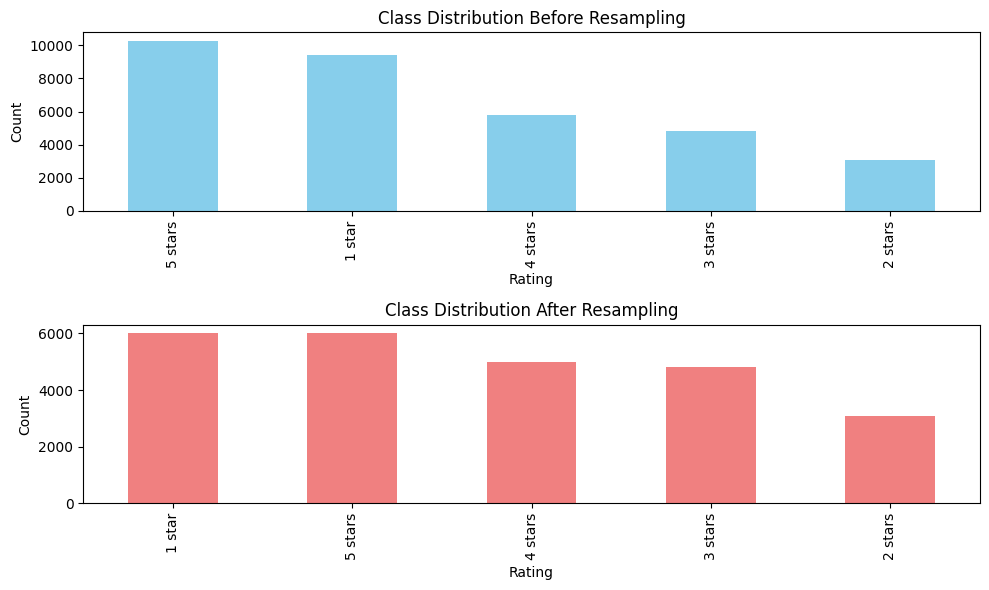

In [37]:
import matplotlib.pyplot as plt

# Distribusi kelas sebelum resampling
class_distribution_before = data['rating'].value_counts()

# Distribusi kelas setelah resampling
class_distribution_after = resampled_data['rating'].value_counts()

# Membuat bar chart
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
class_distribution_before.plot(kind='bar', color='skyblue')
plt.title('Class Distribution Before Resampling')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.subplot(2, 1, 2)
class_distribution_after.plot(kind='bar', color='lightcoral')
plt.title('Class Distribution After Resampling')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [38]:
# # Simpan hasil resampling ke dalam file CSV
# resampled_data.to_csv('hasilResampling.csv', index=False)


In [39]:
df = pd.read_csv("hasilResampling.csv", encoding="latin-1")

In [40]:
df.head(5)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,kepuasan,rating
0,33036,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",3 years ago,love pancake,Very Positive,5 stars
1,4905,McDonald's,Fast food restaurant,"724 Broadway, New York, NY 10003, United States",40.729126,-73.993264,"1,670",10 months ago,excellent,Very Positive,5 stars
2,2485,McDonald's,Fast food restaurant,"72-69 Kissena Blvd, Queens, NY 11367, United S...",40.727401,-73.812460,"2,193",3 years ago,nice clean friendly service,Very Positive,5 stars
3,1470,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",40.922081,-75.399919,"1,028",4 years ago,excellent,Very Positive,5 stars
4,20504,McDonald's,Fast food restaurant,"2400 Alliance Gateway Fwy, Fort Worth, TX 7617...",32.958041,-97.307652,957,2 years ago,they,Very Positive,5 stars


## SKIP N-GRAM + SVM

In [41]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load your dataset
df = pd.read_csv("hasilResampling.csv")

# Handle missing values in the "review" column
df['review'].fillna('', inplace=True)

# Select the columns 'review' and 'kepuasan'
X = df[['review']]
y = df['rating']

# Convert the "review" column to features using Skip-gram (n-gram)
skipgram_vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=15000)
X_skipgram = skipgram_vectorizer.fit_transform(X['review'])  # Use X['review'] instead of X

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_skipgram, y, test_size=0.2, random_state=42)

# Train an SVM model
model = SVC()
model.fit(X_train, y_train)

# Save the trained model to a file
model_filename = 'svm_skipgram.pkl'
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model saved to svm_skipgram.pkl
Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

      1 star       0.87      0.91      0.89      1222
     2 stars       0.99      0.91      0.95       816
     3 stars       0.95      0.89      0.92       794
     4 stars       0.90      0.85      0.87       813
     5 stars       0.81      0.88      0.84      1215

    accuracy                           0.89      4860
   macro avg       0.90      0.89      0.89      4860
weighted avg       0.89      0.89      0.89      4860



## SKIP N-GRAM + NAIVE BAYES

In [42]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load your dataset
df = pd.read_csv("hasilResampling.csv")

# Handle missing values in the "review" column
df['review'].fillna('', inplace=True)

# Select the columns 'review' and 'kepuasan'
X = df[['review']]
y = df['kepuasan']

# Convert the "review" column to features using Skip-gram (n-gram)
skipgram_vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=15000)
X_skipgram = skipgram_vectorizer.fit_transform(X['review'])  # Use X['review'] instead of X

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_skipgram, y, test_size=0.2, random_state=42)

# Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Save the trained model to a file
model_filename = 'naive_bayes_skipgram.pkl'
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model saved to naive_bayes_skipgram.pkl
Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

     Negative       0.93      0.88      0.91       816
      Neutral       0.92      0.82      0.87       794
     Positive       0.91      0.57      0.70       813
Very Negative       0.85      0.91      0.88      1222
Very Positive       0.70      0.90      0.79      1215

     accuracy                           0.83      4860
    macro avg       0.86      0.82      0.83      4860
 weighted avg       0.85      0.83      0.83      4860



## TF IDF + SVM

In [109]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load your dataset
df = pd.read_csv("hasilResampling.csv")

# Handle missing values in the "review" column
df['review'].fillna('', inplace=True)

# Select the columns 'review' and 'kepuasan'
X = df[['review']]
y = df['kepuasan']

# Convert the "review" column to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=40000)
X_tfidf = tfidf_vectorizer.fit_transform(X['review'])  # Use X['review'] instead of X

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train an SVM model
model = SVC()
model.fit(X_train, y_train)

# Save the trained model to a file
model_filename = 'svm_tfidf1.pkl'
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model saved to svm_tfidf1.pkl
Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

     Negative       0.98      0.94      0.96       816
      Neutral       0.95      0.94      0.95       794
     Positive       0.92      0.92      0.92       813
Very Negative       0.89      0.95      0.92      1222
Very Positive       0.91      0.88      0.90      1215

     accuracy                           0.93      4860
    macro avg       0.93      0.93      0.93      4860
 weighted avg       0.93      0.93      0.93      4860



In [81]:
vocabulary = tfidf_vectorizer.get_feature_names_out()


In [100]:
import pickle

with open('vocabulary.pkl', 'wb') as file:
    pickle.dump(vocabulary, file)

## TF IDF + NAIVE BAYES

In [80]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load your dataset
df = pd.read_csv("hasilResampling.csv")

# Handle missing values in the "review" column
df['review'].fillna('', inplace=True)

# Select the columns 'review' and 'kepuasan'
X = df[['review']]
y = df['kepuasan']

# Convert the "review" column to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(X['review'])  # Use X['review'] instead of X

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Save the trained model to a file
model_filename = 'naive_bayes_tfidf.pkl'
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model saved to naive_bayes_tfidf.pkl
Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

     Negative       0.85      0.73      0.79       816
      Neutral       0.88      0.68      0.77       794
     Positive       0.78      0.70      0.74       813
Very Negative       0.71      0.91      0.80      1222
Very Positive       0.78      0.81      0.79      1215

     accuracy                           0.78      4860
    macro avg       0.80      0.77      0.78      4860
 weighted avg       0.79      0.78      0.78      4860



## Predict

# **Splitted the Dataset**

In [118]:
X = df['review']
y = df['kepuasan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
X

0                                             love pancake
1                                                excellent
2                              nice clean friendly service
3                                                excellent
4                                                     they
                               ...                        
24295    worst drive thru took 26 minute get order wors...
24296    customer service terrible waiting five minute ...
24297    biggest waste time money way packed unorganize...
24298                     either phone isnt working employ
24299                                               sucked
Name: review, Length: 24300, dtype: object

**Vectorization**

In [119]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# **Training the Model Using Support Vector Classifier (SVC)**

*I employed the Support Vector Classifier (SVC) algorithm, a robust machine learning technique widely employed for classification. Through training on labeled data, the model gained the ability to forecast review sentiment using their distinctive attributes.*

In [120]:
model = SVC()
model.fit(X_train_tfidf, y_train)

SVC()

In [145]:
y_pred = model.predict(X_test_tfidf)

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Your data loading and preprocessing code here

# Example usage of TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Continue with your modeling and evaluation code


In [123]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9281893004115226
Classification Report:
               precision    recall  f1-score   support

     Negative       0.99      0.95      0.97       815
      Neutral       0.95      0.94      0.95       830
     Positive       0.94      0.92      0.93       818
Very Negative       0.88      0.96      0.92      1164
Very Positive       0.91      0.88      0.90      1233

     accuracy                           0.93      4860
    macro avg       0.94      0.93      0.93      4860
 weighted avg       0.93      0.93      0.93      4860



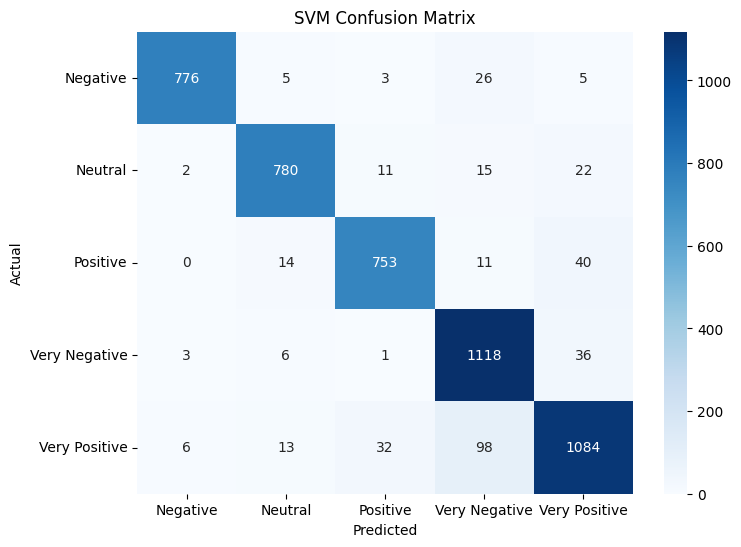

In [146]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm_svm = confusion_matrix(y_test, y_pred)


# Plot confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

<AxesSubplot: >

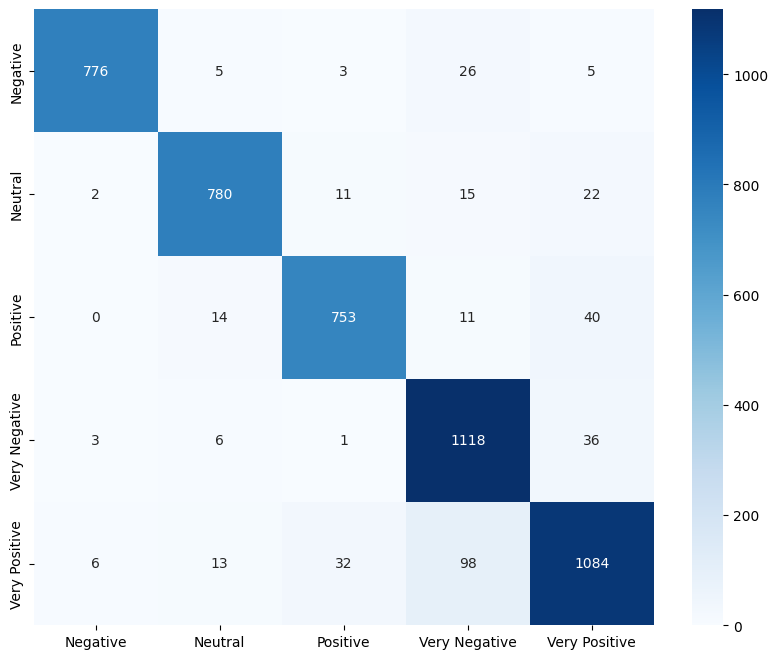

In [131]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)


Kata-kata yang sering muncul untuk kategori Very Positive:

    Kata  Frekuensi
1  stars       6000
0   star          0


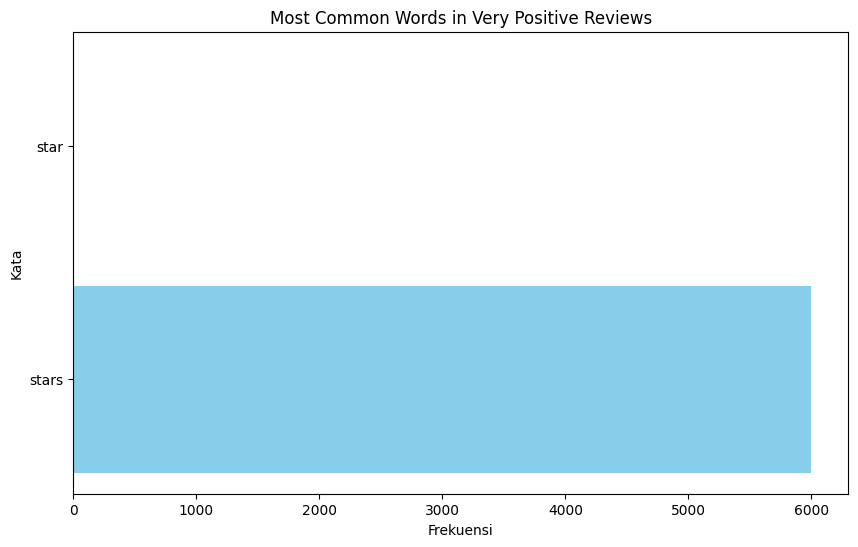


Kata-kata yang sering muncul untuk kategori Positive:

    Kata  Frekuensi
1  stars       4100
0   star          0


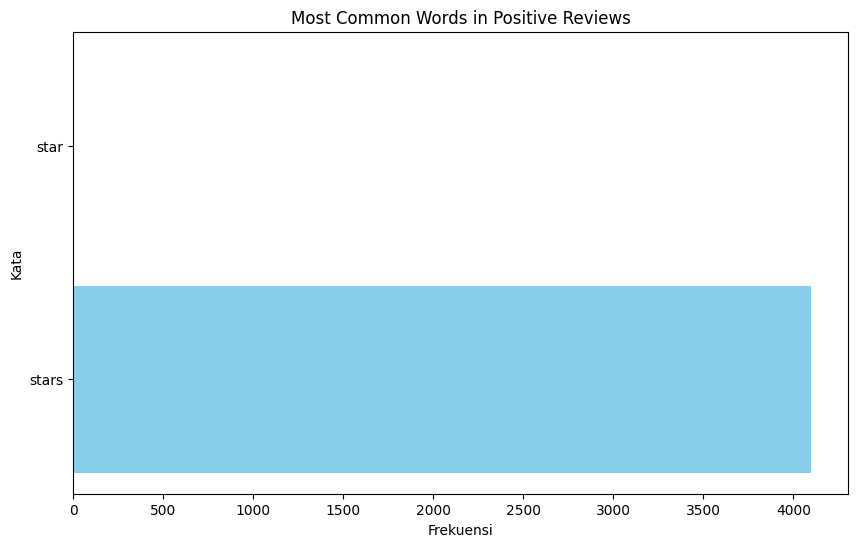


Kata-kata yang sering muncul untuk kategori Neutral:

    Kata  Frekuensi
1  stars       4100
0   star          0


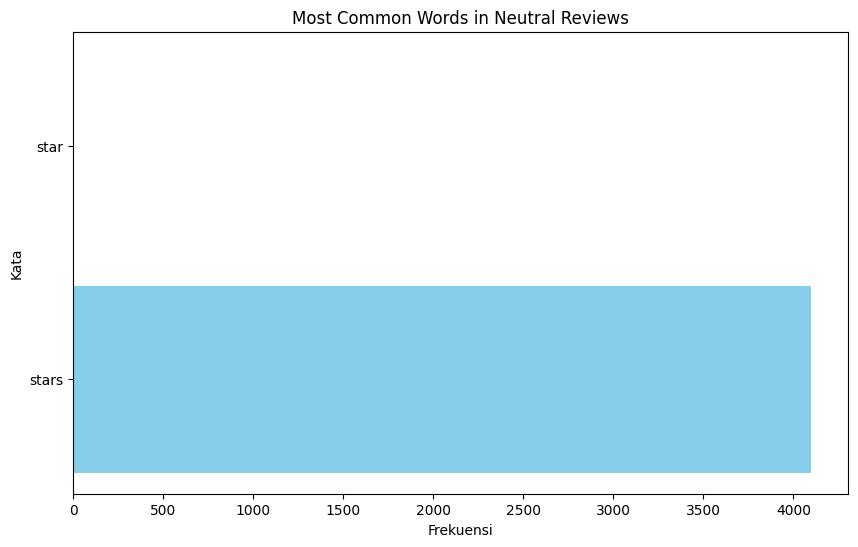


Kata-kata yang sering muncul untuk kategori Negative:

    Kata  Frekuensi
1  stars       4100
0   star          0


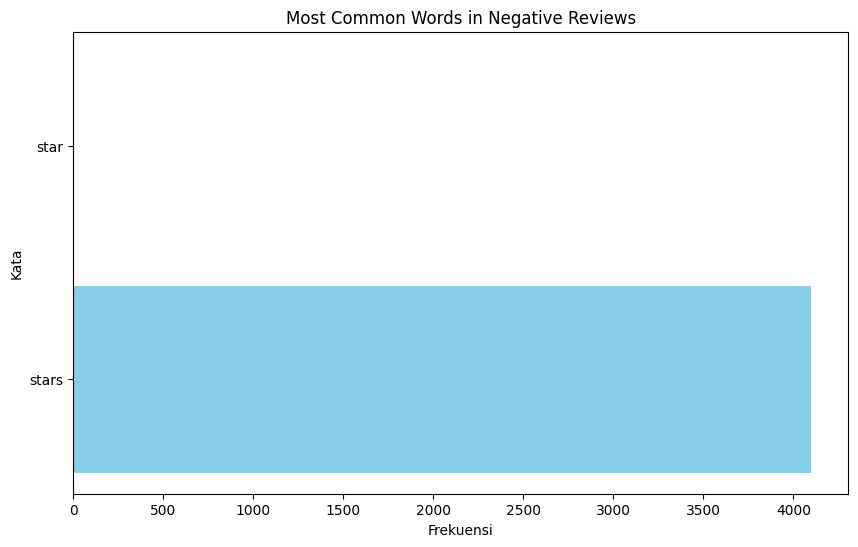


Kata-kata yang sering muncul untuk kategori Very Negative:

    Kata  Frekuensi
0   star       6000
1  stars          0


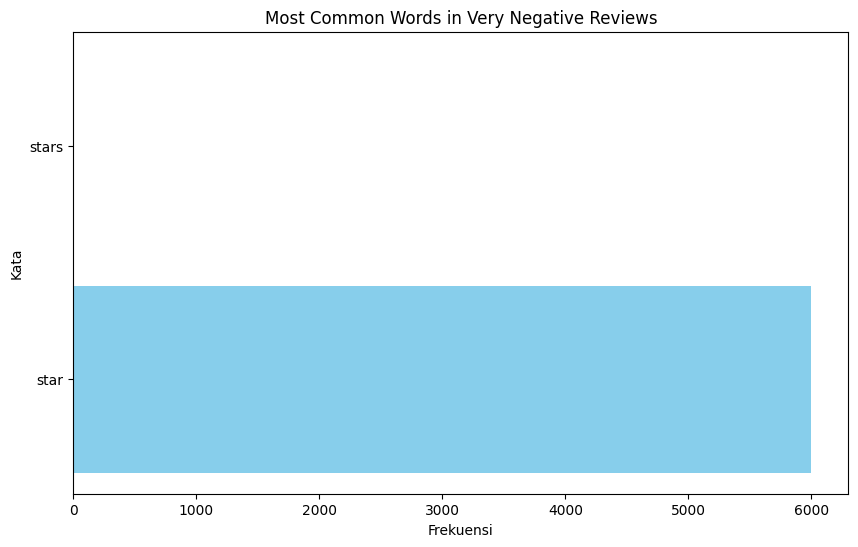

In [134]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Baca file CSV ke dalam DataFrame
df = pd.read_csv('hasilResampling.csv', encoding='latin-1')

# Pisahkan ulasan berdasarkan kategori bintang
reviews_by_rating = {}
for rating in df['kepuasan'].unique():
    subset_df = df[df['kepuasan'] == rating]
    reviews_by_rating[rating] = subset_df['rating'].str.cat(sep=' ')

# Lakukan pemrosesan teks
vectorizer = CountVectorizer()
word_counts = vectorizer.fit_transform(reviews_by_rating.values())

# Tampilkan kata-kata yang sering muncul untuk setiap kategori
for i, rating in enumerate(reviews_by_rating):
    word_count_df = pd.DataFrame({'Kata': vectorizer.get_feature_names(), 'Frekuensi': word_counts[i].toarray().flatten()})
    most_common_words = word_count_df.sort_values(by='Frekuensi', ascending=False).head(10)
    
    print(f"\nKata-kata yang sering muncul untuk kategori {rating}:\n")
    print(most_common_words)

    # Visualisasi kata-kata yang sering muncul
    plt.figure(figsize=(10, 6))
    plt.barh(most_common_words['Kata'], most_common_words['Frekuensi'], color='skyblue')
    plt.title(f'Most Common Words in {rating} Reviews')
    plt.xlabel('Frekuensi')
    plt.ylabel('Kata')
    plt.show()


In [135]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Load your training data from the CSV file
df_train = pd.read_csv("hasilResampling.csv")

# Handle missing values in the "review" column
df_train['review'].fillna('', inplace=True)

# Extract the text data from the "review" column
train_data = df_train['review'].tolist()

# During Training
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data)

# Save the vocabulary for later use
with open('vokabuler1.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer.vocabulary_, file)


In [144]:
import pickle

# Load the vocabulary from the pickle file
with open('vokabuler.pkl', 'rb') as file:
    vocabulary = pickle.load(file)

# Calculate the number of features (words) in the vocabulary
num_features = len(vocabulary)

print(f"The number of features in the vocabulary is: {num_features}")


The number of features in the vocabulary is: 10000


# **Sentiment Prediction Function**

*With user-friendliness in mind, I crafted a function that accepts a review as input and employs the trained SVC model to forecast its sentiment. By analyzing the review's unique attributes, the function assigns it to the positive, negative, or neutral sentiment category, yielding the sentiment prediction as its outcome.*

In [51]:
def predict_sentiment(review):
    review_tfidf = vectorizer.transform([review])
    sentiment = model.predict(review_tfidf)
    return sentiment[0]

# **Testing**

**Sample Testing 1**

In [52]:
new_review = "This restaurant has excellent service and delicious food."
predicted_sentiment = predict_sentiment(new_review)
print("Predicted sentiment:", predicted_sentiment)

Predicted sentiment: Very Positive


**Sample Testing 2**

In [53]:
new_review2 = "This food taste like jerk."
predicted_sentiment = predict_sentiment(new_review2)
print("Predicted sentiment:", predicted_sentiment)

Predicted sentiment: Very Negative


**Sample Testing 3**

In [54]:
new_review3 = "This is dull"
predicted_sentiment = predict_sentiment(new_review3)
print("Predicted sentiment:", predicted_sentiment)

Predicted sentiment: Very Negative


**I extend my gratitude for your assistance! Your votes and recommendations hold immense value as we collaboratively enhance this endeavor.**